In [ ]:
!pip install app-store-scraper
!pip install google_play_scraper
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3
!pip install unidic-lite
!pip install ipadic
!pip install demoji
!apt-get -y install fonts-ipafont-gothic
!pip install nlplot
!pip install fugashi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 806.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into

In [ ]:
from google_play_scraper import app, Sort, reviews, reviews_all
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.linear_model import LogisticRegression
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from pprint import pprint
from transformers import BertJapaneseTokenizer, BertForSequenceClassification, AdamW
import re
import demoji
import matplotlib.pyplot as plt
import MeCab
import collections
from wordcloud import WordCloud
import nlplot
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot

In [ ]:
#google_play_scraperによるレビューのスクレイピング

_reviews, continuation_token = reviews(
    'com.instagram.android',
    lang='ja',
    country='jp',
    sort=Sort.NEWEST,
    count = 10000
)

df = pd.DataFrame(np.array(_reviews), columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.to_csv('insta_review.csv', escapechar='\\')

In [ ]:
#取得したDataframeの確認
df = pd.read_csv('insta_reviewのパス', index_col=0)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,af52e72d-946c-458c-bc4b-d011fdeb1664,梅田龍希,https://play-lh.googleusercontent.com/a-/ALV-U...,結構いい,5,0,314.0.0.20.114,2024-01-22 09:29:13,NaN,NaN,314.0.0.20.114
1,406ab05d-e0b6-4ca4-89cd-f1164550c056,ヤザワ発動機,https://play-lh.googleusercontent.com/a-/ALV-U...,SDカードの画像が読み込めず、投稿できない。,1,0,314.0.0.20.114,2024-01-22 09:26:11,NaN,NaN,314.0.0.20.114
2,d46a015c-4361-4086-bc34-b45bfbfe36ae,熊本ヒデアキ,https://play-lh.googleusercontent.com/a-/ALV-U...,まぁ 使いやすい,3,0,314.0.0.20.114,2024-01-22 08:57:44,NaN,NaN,314.0.0.20.114
3,05bcef71-4c68-4a46-ad68-258108e00409,Mihoko Tsuda,https://play-lh.googleusercontent.com/a-/ALV-U...,最近(2022.9.17以降)撮影した写真がギャラリーに出てこない。これでは投稿出来ません。...,1,3,314.0.0.20.114,2024-01-22 08:35:42,NaN,NaN,314.0.0.20.114
4,9beaab52-9e03-43b6-bc3a-415d6c5511ad,青木恵二,https://play-lh.googleusercontent.com/a-/ALV-U...,使えなくなりました,1,1,9.1.0,2024-01-22 08:33:19,NaN,NaN,9.1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,3473ac48-3efa-402e-8873-5998feb301f0,RYUJI INAGAWA,https://play-lh.googleusercontent.com/a/ACg8oc...,投稿の他にストーリーもリールもあって楽しい,5,0,278.0.0.21.117,2023-04-16 00:48:10,NaN,NaN,278.0.0.21.117
9996,b62ccd57-939c-45d6-8121-db684f836a84,花山道る,https://play-lh.googleusercontent.com/a-/ALV-U...,犬のためにありがたいです,5,0,278.0.0.21.117,2023-04-16 00:47:30,NaN,NaN,278.0.0.21.117
9997,58ba6fcb-20b5-4880-b305-fe554e6e793a,石川英昭,https://play-lh.googleusercontent.com/a/ACg8oc...,色々な情報を検索するのにも便利。,3,0,278.0.0.21.117,2023-04-16 00:36:10,NaN,NaN,278.0.0.21.117
9998,58b2cc69-a282-489a-8795-6696c41f985a,榎本好枝,https://play-lh.googleusercontent.com/a/ACg8oc...,３日間絶対観に行きます。,5,0,278.0.0.21.117,2023-04-16 00:17:31,NaN,NaN,278.0.0.21.117


In [ ]:
_df = df[['score', 'content']]
_df

#for i in range(1, 6):
  #print(f'score_{i} : ' + str(_df.score[df['score']==i].count()))
'''
スコア別の数は以下の通り
score_1 : 3047
score_2 : 1188
score_3 : 1351
score_4 : 1447
score_5 : 2967
'''
_df = _df[_df['score'] != 3] #スコア3の行を削除

_df.loc[_df.score < 3, 'score'] = 0
_df.loc[_df.score > 3, 'score'] = 1
_df #二値分類に変換

,score,content
0,1,結構いい
1,0,SDカードの画像が読み込めず、投稿できない。
3,0,最近(2022.9.17以降)撮影した写真がギャラリーに出てこない。これでは投稿出来ません。...
4,0,使えなくなりました
5,1,私にはいいと思います。
...,...,...
9994,1,無料でこれは、とてもいいと思うし また、推しの投稿などもしっかりと見れるからとてもいい
9995,1,投稿の他にストーリーもリールもあって楽しい
9996,1,犬のためにありがたいです
9998,1,３日間絶対観に行きます。


In [ ]:
#BERTの事前学習モデル・トークナイザーをインストール
MODEL_NAME = 'cl-tohoku/bert-base-japanese-whole-word-masking'
model = BertForSequenceClassification.from_pretrained(MODEL_NAME,num_labels=2)
tokenizer = BertJapaneseTokenizer.from_pretrained(MODEL_NAME)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
max_len = [] #BERTに入力する文章の最大入力長の調査

contents = _df.content.values
labels = _df.score.values

for content in contents:
  token = tokenizer.tokenize(content)
  max_len.append(len(token))

max_len = sorted(max_len,  reverse=True)

In [ ]:
contents = _df.content.values
labels = _df.score.values

def clean_text(content): #特殊文字・絵文字等を削除する
        symbols = '["#$%&\'(),-./:;‹<=>›@\\]^_´`{|}、~☆★■\∀…]'
        content = re.sub(symbols, '', content)
        content = demoji.replace(string=content, repl='')
        content = content.translate(str.maketrans({'\u3000':'', '\U0001fae1':'', '\u2060':''}))
        return content

_contents = []
for content in contents:
  _content = clean_text(content)
  _contents.append(_content)

#前処理したレビューとスコアのDataframeを作成
_df['contents'] = _contents
_df = _df.drop('content', axis=1)
_contents

['結構いい',
 'SDカードの画像が読み込めず投稿できない。',
 '最近2022917以降撮影した写真がギャラリーに出てこない。これでは投稿出来ません。 【追記】2024112頃からまた写真（SDカード）が投稿できなくなってます。 早急に改善を願います。',
 '使えなくなりました',
 '私にはいいと思います。',
 '使いだが難しいですが何とか楽しく使わせてもらってます！',
 'スマホ内の写真動画が投稿できなくなりました。 いつになったら直りますか？',
 '年配には少々難しいですが 頑張って続けまっす!',
 '不具合が多すぎる。',
 'いつも楽しく使わせて頂いてます。 ストーリー お知らせが来ません。 続きを読む押すとキャプション読めず 真っ黒です。 読めるポストと読めないポストがあり とても不便です。 インストールし直しても直りません。 改善 宜しくお願いします。 因みにAndroidです。',
 '年明けのアップデートからSDカードに保存してある写真を投稿できなくなった。 投稿するためには一々アルバムアプリから共有して投稿しないといけないというのはアプリとして役をなしていない。',
 '年明けてのアップデートからSDカードの写真が利用できない不具合が続いています 早急に解決してください',
 '他の人もあげてますがなんか急に撮ったSDカードの写真がインスタあげようとおもっても表示されなくなりましたが何でですか？早急に直してくださいね',
 'SDカードに保存してる写真が投稿できません。早くなおしてほしいです',
 '押しの情報を得るのに不可欠なアイテム！',
 'いつも助かってます！ありがとうございます',
 'SDカードに保存した写真がポスト出来ない！',
 'まだ慣れませんが有り難く使わせていただいています！',
 '急にSDカードに保存した動画や写真が読み込めなくなりました。とても不便で困ってます。',
 'DCIMの画像読み込まんくなってゴミ',
 '以前利用していましたが今回再び制作作品を見ていただきたくなり発表しました。画像や動画のクオリティーが上がっていてより臨場感とボリュームあるプラットホームになっていましたこれからも新しい試みに期待しつつよろしくお願い致します',
 'アンドロイドです。 いいかげん投稿した画像や動画を複製して

In [ ]:
train_contents, test_contents, train_labels, test_labels = train_test_split(_contents, labels, test_size=0.2, random_state=0)

def Token_Enc(sentences): #文章を語彙（トークン）に分割したうえで、BERTモデルに入力できる形に変換する処理
    input_ids = [] #入力するToken ID
    attention_masks = [] #attntion mask：その値が大きければ大きいほどその領域に注目し、分類に役立ちそうにない領域は値を小さくするもの

    for sentence in sentences:
      encoding = tokenizer(
          sentence,
          max_length = 325,
          padding = 'max_length',
          truncation=True,
          return_tensors = 'pt'
          )
      input_ids.append(encoding['input_ids'])
      attention_masks.append(encoding['attention_mask'])
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    return input_ids, attention_masks

train_input_ids, train_attention_masks = Token_Enc(train_contents)
train_labels = torch.tensor(train_labels)

#変換処理ができているか確認
print('Original: ', tokenizer.tokenize(train_contents[0]))
print('Token IDs:', train_input_ids[0])

Original:  ['良き']
Token IDs: tensor([    2, 27348,     3,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,

In [ ]:
#データセット
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

#GPUの設定
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

#最適化
optimizer = AdamW(model.parameters(), lr=2e-5)

def train(model):
  model.train()
  train_loss = 0
  for input_id, mask, label in train_dataloader:
    input_id = input_id.to(device)
    mask = mask.to(device)
    label = label.to(device)
    optimizer.zero_grad()
    outputs = model(input_id, token_type_ids=None, attention_mask=mask, labels=label)
    loss = outputs.loss
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    train_loss += loss.item()
  return train_loss

In [ ]:
#ファインチューニング
max_epoch = 20
train_loss_ = []

for epoch in range(max_epoch):
    train_ = train(model)
    train_loss_.append(train_)
    print(f'traning loss : {train_}')

traning loss : 73.04595170170069
traning loss : 51.10107424855232
traning loss : 37.0227913800627
traning loss : 24.441263953689486
traning loss : 17.18496735196095
traning loss : 12.946351255464833
traning loss : 10.21147976705106
traning loss : 8.985696202405961
traning loss : 8.37550647246826
traning loss : 8.565291044928017
traning loss : 6.657896319011343
traning loss : 7.045256660654559
traning loss : 6.868063453759532
traning loss : 6.432919128696085
traning loss : 5.741366159360041
traning loss : 5.052533014059009
traning loss : 5.979368209526001
traning loss : 6.512146843982919
traning loss : 6.613531433064054
traning loss : 5.288486480487336


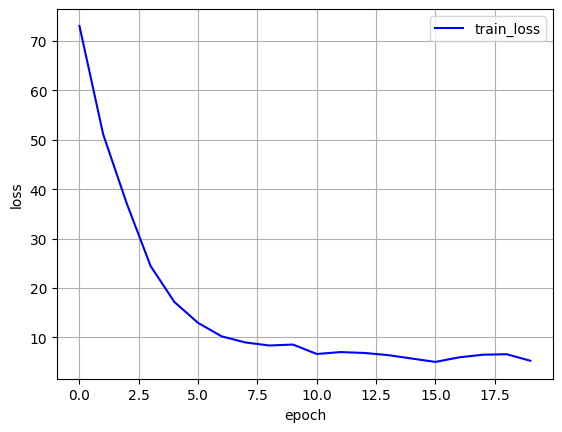

In [ ]:
#損失推移可視化
plt.plot(range(len(train_loss_)), train_loss_, c='b', label='train_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#モデルの保存
torch.save(model, 'BERT_instagram_review.pth')

In [ ]:
#分割推論のための前処理（句点等で分割）
split_test_contents = []
contents_num = []
split_labels = []

for i in range(len(test_contents)):
    sentence = re.split('[。!?！？]', test_contents[i])
    for small_sentence in sentence:
        if small_sentence != '': #分割できる限り
            split_test_contents.append(small_sentence) #分割した短文
            contents_num.append(i) #短文の属する文章の識別番号
            split_labels.append(test_labels[i]) #ポジネガ分類ラベル
split_df = pd.DataFrame({'contents_number':contents_num, 'split_test_contents':split_test_contents, 'split_labels':split_labels})
split_df

,contents_number,split_test_contents,split_labels
0,0,ははっ最高,1
1,1,見るも良し投稿するのも良し色々と楽しめる,1
2,2,おすすめを非表示設定しても消せない,0
3,2,何のための設定か,0
4,2,広告は許容できるが不快なオススメが多すぎる,0
...,...,...,...
3165,1728,好きなアーティストさんのライブ配信とか見れるの本当に嬉しかったです,1
3166,1728,非公開にすると今までは自分がフォローした相手はフォローされ返されてなくても自分の投稿が見れ...,1
3167,1728,非公開設定がもっとカスタマイズ出来るようになります様に,1
3168,1729,ひらかんのやが,0


In [ ]:
#通常のデータローダー
_test_input_ids, _test_attention_masks = Token_Enc(test_contents)
_test_labels = torch.tensor(test_labels)
_test_dataset = TensorDataset(_test_input_ids, _test_attention_masks, _test_labels)
_test_dataloader = DataLoader(_test_dataset, batch_size=32, shuffle=False)

In [ ]:
#通常の推論
model = torch.load('BERT_instagram_review.pthのパス')

_pred_df = pd.DataFrame(np.zeros((0, 1)), columns=['pred_labels'])
_label_df = pd.DataFrame(np.zeros((0, 1)), columns=['true_labels'])
test_df = pd.concat([_pred_df, _label_df], axis=1)

model.eval() #推論
for input_id, mask, label in _test_dataloader:
    input_id = input_id.to(device)
    mask = mask.to(device)
    label = label.to(device)
    with torch.no_grad():
        preds = model(input_id, token_type_ids=None, attention_mask=mask)
        #print(f'出力:{preds}')
    temp_pred_df = pd.DataFrame(np.argmax(preds[0].cpu().numpy(), axis=1), columns=['pred_labels'])
    temp_label_df = pd.DataFrame(label.cpu().numpy(), columns=['true_labels'])
    temp_accuracy_df = pd.concat([temp_pred_df, temp_label_df], axis=1)
    test_df = pd.concat([test_df, temp_accuracy_df]).reset_index(drop=True)

test_df.insert(0, 'contents', test_contents)
test_df.to_csv('result_Raw.csv')
test_df

,contents,pred_labels,true_labels
0,ははっ最高,1.0,1.0
1,見るも良し投稿するのも良し色々と楽しめる,1.0,1.0
2,おすすめを非表示設定しても消せない。何のための設定か。広告は許容できるが不快なオススメが多すぎる。,0.0,0.0
3,凄くいいんです。しかしストーリーを見ている時に画面触るとストーリーが止まります。次のストーリ...,1.0,0.0
4,とてもよき,1.0,1.0
...,...,...,...
1725,相変わらず広告とおすすめが多すぎます。 もっと減らして下さい。,0.0,0.0
1726,Facebookもそうだったけど定期的に勝手に英語表記にするのをやめてほしい。,0.0,0.0
1727,身内友達の近況が知れて大好きで〜す,1.0,1.0
1728,好きなアーティストさんのライブ配信とか見れるの本当に嬉しかったです！ 非公開にすると今までは...,1.0,1.0


In [ ]:
#句点で分割したデータローダー
test_input_ids, test_attention_masks = Token_Enc(split_df.split_test_contents.values)
split_labels = torch.tensor(split_df.split_labels.values)
test_dataset = TensorDataset(test_input_ids, test_attention_masks, split_labels)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
#句点等で分割した場合の推論
model = torch.load('BERT_instagram_review.pthのパス')

pred_df = pd.DataFrame(np.zeros((0, 1)), columns=['split_pred_labels'])
label_df = pd.DataFrame(np.zeros((0, 1)), columns=['split_true_labels'])
accuracy_df = pd.concat([pred_df, label_df], axis=1)

model.eval() #推論
for input_id, mask, label in test_dataloader:
    input_id = input_id.to(device)
    mask = mask.to(device)
    label = label.to(device)
    with torch.no_grad():
        preds = model(input_id, token_type_ids=None, attention_mask=mask)
        #print(f'出力:{preds}')
    temp_pred_df = pd.DataFrame(np.argmax(preds[0].cpu().numpy(), axis=1), columns=['split_pred_labels'])
    temp_label_df = pd.DataFrame(label.cpu().numpy(), columns=['split_true_labels'])
    temp_accuracy_df = pd.concat([temp_pred_df, temp_label_df], axis=1)
    accuracy_df = pd.concat([accuracy_df, temp_accuracy_df]).reset_index(drop=True)

split_df = split_df.drop('split_labels', axis=1)
split_df = pd.concat([split_df, accuracy_df], axis=1)
split_df.to_csv('result_Split.csv')
split_df

,contents_number,split_test_contents,split_pred_labels,split_true_labels
0,0,ははっ最高,1.0,1.0
1,1,見るも良し投稿するのも良し色々と楽しめる,1.0,1.0
2,2,おすすめを非表示設定しても消せない,0.0,0.0
3,2,何のための設定か,0.0,0.0
4,2,広告は許容できるが不快なオススメが多すぎる,0.0,0.0
...,...,...,...,...
3165,1728,好きなアーティストさんのライブ配信とか見れるの本当に嬉しかったです,1.0,1.0
3166,1728,非公開にすると今までは自分がフォローした相手はフォローされ返されてなくても自分の投稿が見れ...,0.0,1.0
3167,1728,非公開設定がもっとカスタマイズ出来るようになります様に,0.0,1.0
3168,1729,ひらかんのやが,0.0,0.0


In [ ]:
#分割した文章を結合、多数決でネガポジ分類
contents_length = contents_num[-1]+1
pred_labels = []

for j in range(contents_length):
    temp_df = split_df[split_df['contents_number'] == j]
    sum_pred = 0
    for x, split_pred_label in enumerate(temp_df['split_pred_labels']):
        if split_pred_label == 1:
            sum_pred += 1
        elif split_pred_label == 0:
            sum_pred += -1
    if sum_pred >= 0: #ポジティブが半分以上になったら
        sum_pred_label = 1
    elif sum_pred < 0: #ネガティブが過半数になったら
        sum_pred_label = 0
    pred_labels.append(sum_pred_label)

test_df_alt = pd.DataFrame({'test_contents':test_contents, 'pred_labels':pred_labels, 'true_labels':test_labels})
test_df_alt.to_csv('result_SplitJoin.csv')
test_df_alt

,test_contents,pred_labels,true_labels
0,ははっ最高,1,1
1,見るも良し投稿するのも良し色々と楽しめる,1,1
2,おすすめを非表示設定しても消せない。何のための設定か。広告は許容できるが不快なオススメが多すぎる。,0,0
3,凄くいいんです。しかしストーリーを見ている時に画面触るとストーリーが止まります。次のストーリ...,1,0
4,とてもよき,1,1
...,...,...,...
1725,相変わらず広告とおすすめが多すぎます。 もっと減らして下さい。,0,0
1726,Facebookもそうだったけど定期的に勝手に英語表記にするのをやめてほしい。,0,0
1727,身内友達の近況が知れて大好きで〜す,1,1
1728,好きなアーティストさんのライブ配信とか見れるの本当に嬉しかったです！ 非公開にすると今までは...,0,1


In [ ]:
#通常
preds_ = test_df.pred_labels.values
label_ = test_df.true_labels.values

precision, recall, f1, _ = precision_recall_fscore_support(label_, preds_, average='macro')
acc = accuracy_score(label_, preds_)

#分割
preds_alt = test_df_alt.pred_labels.values
label_alt = test_df_alt.true_labels.values

precision_alt, recall_alt, f1_alt, _ = precision_recall_fscore_support(label_alt, preds_alt, average='macro')
acc_alt = accuracy_score(label_alt, preds_alt)

#想定と違い分割推論の方がスコアが低かった
print('・通常の推論')
print('--------------------------------')
print(f'accuracy: {acc}\nf1: {f1}\nprecision: {precision}\nrecall: {recall}')
print('--------------------------------\n')
print('・句点等で分割推論')
print('--------------------------------')
print(f'accuracy: {acc_alt}\nf1: {f1_alt}\nprecision: {precision_alt}\nrecall: {recall_alt}')
print('--------------------------------')

・通常の推論
--------------------------------
accuracy: 0.8826589595375722
f1: 0.8826344503763859
precision: 0.8827196959166872
recall: 0.8831165269231953
--------------------------------

・句点等で分割推論
--------------------------------
accuracy: 0.861271676300578
f1: 0.860895202358617
precision: 0.8619712217265083
recall: 0.8604893229030787
--------------------------------


In [ ]:
#ポジネガそれぞれの頻出単語を抽出、可視化のための前処理
positive_list = _df['score'] == 1
negative_list = _df['score'] == 0
positive_texts = _df.contents[positive_list]
negative_texts = _df.contents[negative_list]

def join_contents(contents_df):
    contents = ''
    for content in contents_df:
        contents += str(content)
    return contents

select = ['名詞']
t = MeCab.Tagger('')
t.parse('')
#あまり意味のなさげな単語を排除
stop_words = ['人', 'こと', 'すごい', 'いい', 'なく', '皆', '日', '順', '数', '元', '月', '自分', 'イン', 'スタ', '森田', 'アイ', '罒', 'まま', '事', '時', '方', '一', '前', '気', '他', 'もの', '度', '今', '何', '1', 'ﾟ', 'ﾛ']

def wakati(content):
    content = str(content)
    node = t.parseToNode(content)
    words = []
    while node:
        word = node.surface
        pos = node.feature.split(',')[0]
        if pos in select and not (word in stop_words):
           words.append(word)
        node = node.next
    return words

positive_words = join_contents(positive_texts)
positive_words = wakati(positive_words)
c_positive = collections.Counter(positive_words)

negative_words = join_contents(negative_texts)
negative_words = wakati(negative_words)
c_negative = collections.Counter(negative_words)

print(c_positive.most_common())
print(c_negative.most_common())

[('投稿', 479), ('写真', 249), ('アプリ', 182), ('最高', 177), ('動画', 144), ('情報', 143), ('画像', 109), ('機能', 104), ('利用', 100), ('便利', 87), ('最近', 73), ('表示', 73), ('Instagram', 68), ('世界', 68), ('改善', 60), ('楽しみ', 60), ('毎日', 58), ('アカウント', 58), ('編集', 57), ('ストーリー', 55), ('フォロー', 55), ('音楽', 55), ('友達', 54), ('リール', 53), ('ところ', 48), ('コメント', 46), ('日記', 43), ('具合', 43), ('タグ', 42), ('SNS', 42), ('アップ', 40), ('感じ', 38), ('満足', 37), ('時間', 37), ('趣味', 36), ('広告', 36), ('ツール', 35), ('初心', 35), ('使用', 34), ('画面', 34), ('記録', 33), ('文字', 33), ('世話', 32), ('店', 32), ('発信', 32), ('共有', 31), ('問題', 31), ('操作', 31), ('インスタグラム', 30), ('nan', 30), ('日々', 29), ('更新', 29), ('活用', 29), ('ラム', 29), ('Android', 28), ('検索', 28), ('以外', 27), ('ため', 27), ('スマホ', 27), ('保存', 26), ('興味', 26), ('あと', 26), ('インス', 26), ('とき', 25), ('思い出', 25), ('勝手', 25), ('追加', 24), ('年', 24), ('参考', 24), ('設定', 24), ('5', 24), ('バグ', 24), ('DM', 24), ('普通', 23), ('Twitter', 23), ('感謝', 23), ('そそ', 23), ('以前', 22), ('生活', 22), ('

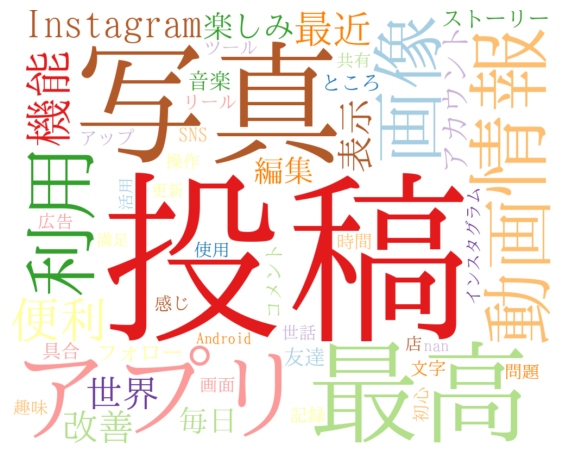

In [ ]:
#positive_WordCloud
positive_words = join_contents(positive_texts)
positive_words = wakati(positive_words)

positive_cloud = ' '.join(positive_words)

wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/fonts-japanese-mincho.ttf', background_color='white', max_words=50, width=1000, height=800, colormap='Paired').generate(positive_cloud)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

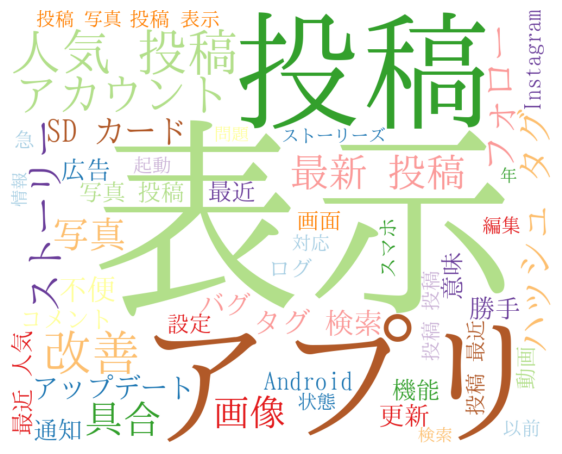

In [ ]:
#negative_WordCloud
negative_words = join_contents(negative_texts)
negative_words = wakati(negative_words)

negative_cloud = ' '.join(negative_words)

wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/fonts-japanese-mincho.ttf', background_color='white', max_words=50, width=1000, height=800, colormap='Paired').generate(negative_cloud)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#共起ネットワーク（以下はポジティブ）

positive_wakati_list = []
for content in positive_texts:
    content = str(content)
    temp = wakati(content)
    positive_wakati_list.append(temp)

negative_wakati_list = []
for content in negative_texts:
    temp = wakati(content)
    negative_wakati_list.append(temp)

positive_df = pd.DataFrame({'posi_raw_contents':positive_texts, 'wakati':positive_wakati_list})
positive_df = positive_df.reset_index(drop=True)
negative_df = pd.DataFrame({'nega_raw_contents':negative_texts, 'wakati':negative_wakati_list})
negative_df = negative_df.reset_index(drop=True)

npt_posi = nlplot.NLPlot(positive_df, target_col='wakati')
npt_nega = nlplot.NLPlot(negative_df, target_col='wakati')


npt_posi.build_graph(min_edge_frequency=6)
co = npt_posi.co_network(title='Co-occurrence network', width=1200, height=600)
iplot(co)

node_size:81, edge_size:122


In [ ]:
#共起ネットワーク（ネガティブ）
npt_nega.build_graph(min_edge_frequency=25)
co = npt_nega.co_network(title='Co-occurrence network', width=1200, height=600)
iplot(co)

node_size:114, edge_size:389


In [ ]:
#ポジティブunigram
uni_posi = npt_posi.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
)
uni_posi.show()

100%|██████████| 4414/4414 [00:00<00:00, 131345.39it/s]


In [ ]:
#ポジティブbigram
bi_posi = npt_posi.bar_ngram(
    title='bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
)
bi_posi.show()

100%|██████████| 4414/4414 [00:00<00:00, 220942.52it/s]


In [ ]:
#ネガティブunigram
uni_nega = npt_nega.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
)
uni_nega.show()

100%|██████████| 4235/4235 [00:00<00:00, 87828.95it/s]


In [ ]:
#ネガティブBi-gram
bi_nega = npt_nega.bar_ngram(
    title='bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
)
bi_nega.show()

100%|██████████| 4235/4235 [00:00<00:00, 110269.53it/s]


In [ ]:
#ロジスティック回帰のための前処理（もう少しきれいにできる）
posi_length = len(positive_df)
nega_length = len(negative_df)

posi_keyword = []
nega_keyword = []
for word, count in c_positive.most_common(20):
    posi_keyword.append(word)
for word, count in c_negative.most_common(20):
    nega_keyword.append(word)

keyword = list(set(posi_keyword + nega_keyword))

posi_arr = np.zeros((posi_length, len(keyword)))
nega_arr = np.zeros((nega_length, len(keyword)))

for i in range(posi_length):
    for j in range(len(keyword)):
        if keyword[j] in positive_df.wakati[i]:
           posi_arr[i, j] += 1

for i in range(nega_length):
    for j in range(len(keyword)):
        if keyword[j] in negative_df.wakati[i]:
           nega_arr[i, j] += 1

posi_key_df = pd.DataFrame(posi_arr)
posi_key_df['labels'] = 1
nega_key_df = pd.DataFrame(nega_arr)
nega_key_df['labels'] = 0
keyword.append('labels')

key_df = pd.concat([posi_key_df, nega_key_df])
key_df.columns = keyword
key_df = key_df.reset_index(drop=True)
key_df

,改善,ストーリー,SD,不便,Instagram,画像,最高,最新,情報,動画,...,機能,編集,人気,写真,利用,最近,便利,検索,毎日,labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
8645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
x = key_df.drop('labels', axis=1).values
y = key_df['labels']

LogReg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
LogReg.fit(x_train, y_train)
coef = LogReg.coef_ [0]

y_pred = LogReg.predict(x_test)
acc = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('ロジスティック回帰')
print('--------------------------------')
print(f'accuracy: {acc}\nf1: {f1}\nprecision: {precision}\nrecall: {recall}')
print('--------------------------------\n')

ロジスティック回帰
--------------------------------
accuracy: 0.7543352601156069
f1: 0.7876061969015492
precision: 0.7118337850045167
recall: 0.8814317673378076
--------------------------------



In [ ]:
key_df_corr = key_df.corr()
key_df_corr

,改善,ストーリー,SD,不便,Instagram,画像,最高,最新,情報,動画,...,機能,編集,人気,写真,利用,最近,便利,検索,毎日,labels
改善,1.000000,0.119738,0.141899,0.084381,0.042685,0.135170,-0.036673,0.031608,0.006981,0.098159,...,0.043531,0.044153,0.018274,0.150947,0.019627,0.068774,-0.009250,0.030323,-0.017191,-0.204146
ストーリー,0.119738,1.000000,0.027988,0.028009,-0.004572,0.087764,-0.025571,-0.009009,-0.023246,0.077946,...,0.025751,0.015187,-0.023606,0.065238,-0.008164,0.018677,-0.016712,-0.007091,0.001481,-0.150575
SD,0.141899,0.027988,1.000000,0.034293,-0.009309,0.208655,-0.024433,-0.002837,-0.020746,0.053185,...,-0.017332,-0.007592,-0.023428,0.258367,0.011340,0.004659,-0.018257,-0.024498,-0.007159,-0.160659
不便,0.084381,0.028009,0.034293,1.000000,0.003682,0.025317,-0.025379,0.226226,0.088330,0.018043,...,0.044782,-0.009042,0.243342,0.063941,0.014039,0.166705,0.012815,0.215050,-0.015680,-0.162122
Instagram,0.042685,-0.004572,-0.009309,0.003682,1.000000,0.022764,0.018462,0.014668,0.006921,0.013818,...,0.025992,0.033380,0.023843,0.016895,0.036790,0.013046,-0.015881,0.011554,0.032190,-0.047687
画像,0.135170,0.087764,0.208655,0.025317,0.022764,1.000000,-0.027780,0.024301,0.003472,0.099713,...,0.022832,0.116820,0.008204,0.021584,0.009269,0.051088,-0.011882,0.037194,0.001258,-0.150776
最高,-0.036673,-0.025571,-0.024433,-0.025379,0.018462,-0.027780,1.000000,-0.033726,-0.015153,-0.018695,...,-0.011932,-0.020326,-0.029979,-0.040447,-0.015273,-0.032586,-0.015971,-0.035126,0.004824,0.135126
最新,0.031608,-0.009009,-0.002837,0.226226,0.014668,0.024301,-0.033726,1.000000,0.276402,-0.017025,...,0.050879,-0.008849,0.567002,-0.002474,0.011840,0.201927,0.004138,0.509305,0.008620,-0.218612
情報,0.006981,-0.023246,-0.020746,0.088330,0.006921,0.003472,-0.015153,0.276402,1.000000,-0.012724,...,0.012638,-0.013125,0.222797,-0.020355,0.042971,0.123646,0.065357,0.186421,-0.003533,-0.027631
動画,0.098159,0.077946,0.053185,0.018043,0.013818,0.099713,-0.018695,-0.017025,-0.012724,1.000000,...,0.039278,0.084472,-0.037267,0.127987,-0.005733,0.051901,0.003637,-0.022690,-0.006168,-0.064095


In [ ]:
#回帰係数の可視化
feature = key_df.drop('labels', axis=1).columns
coef_df = pd.DataFrame(coef, index=[feature], columns=['coef'])
coef_df

,coef
改善,-1.295275
ストーリー,-1.754644
SD,-2.410328
不便,-1.696952
Instagram,-0.754504
画像,-0.763203
最高,2.412039
最新,-1.844168
情報,0.686315
動画,-0.020127


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=76ad616bd74e9de17cedc2b5fcf2733dd57b4306dd5cda533ae8e1d9b73855e5
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


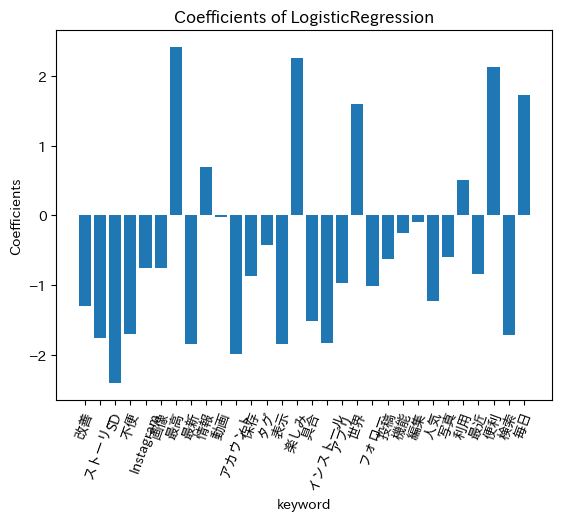

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib

plt.bar(feature, coef)
plt.xticks(rotation=70)
plt.xlabel('keyword')
plt.ylabel('Coefficients')
plt.title('Coefficients of LogisticRegression')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#多重共線性確認
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(key_df.drop('labels', axis=1), i) for i in range(key_df.drop('labels', axis=1).shape[1])]
vif['features'] = key_df.drop('labels', axis=1).columns
vif

,VIF Factor,features
0,1.034275,Instagram
1,1.306466,写真
2,1.005137,最高
3,1.092364,動画
4,1.027617,利用
5,1.013862,便利
6,1.322888,最近
7,1.517491,タグ
8,1.022050,毎日
9,1.840403,最新
